# Netflix Movies & TV Shows - Exploratory Data Analysis (EDA)


In [12]:
# 1) Confirm working directories and list files
import os

print("Working dir:", os.getcwd())
print("List root /content:")
print(os.listdir('/content')[:50])

# If you uploaded to Drive and mounted Drive, check that too:
from google.colab import drive
drive.mount('/content/drive')  # run and follow link to authorize if needed

# list your Colab Notebooks folder (where your screenshot showed the file)
path = '/content/drive/MyDrive/Colab Notebooks'
print("Files in your Colab Notebooks folder:")
print(os.listdir(path))


Working dir: /content
List root /content:
['.config', 'top_countries.png', 'drive', 'sample_data']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in your Colab Notebooks folder:
['Netflix_analysis.ipynb', 'netflix_titles.csv']


In [2]:
# 2) load libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', 50)
sns.set_style('darkgrid')
%matplotlib inline

# 3) load dataset (replace path if different)
data_path = '/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv'
df = pd.read_csv(data_path)

# Quick peek
print("shape:", df.shape)
df.head(5)


shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# 4) info & missing values
df.info()
print("\nNull counts:")
print(df.isnull().sum().sort_values(ascending=False))

# show columns
df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Null counts:
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
descrip

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [4]:
# 5) Clean and convert
# clean date_added -> datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# standardize country: many rows have multiple countries separated by ','
# we'll keep the original column but also create a parsed list column
df['country_list'] = df['country'].fillna('Unknown').apply(lambda x: [c.strip() for c in x.split(',')] if x!='Unknown' else ['Unknown'])

# cast -> list of actors
df['cast_list'] = df['cast'].fillna('Unknown').apply(lambda x: [c.strip() for c in x.split(',')] if x!='Unknown' else ['Unknown'])

# create year_added from date_added (for trend of additions)
df['year_added'] = df['date_added'].dt.year
# release_year is already present; keep both for analysis
df[['release_year','year_added']].head()


,release_year,year_added
0,2020,2021.0
1,2021,2021.0
2,2021,2021.0
3,2021,2021.0
4,2021,2021.0


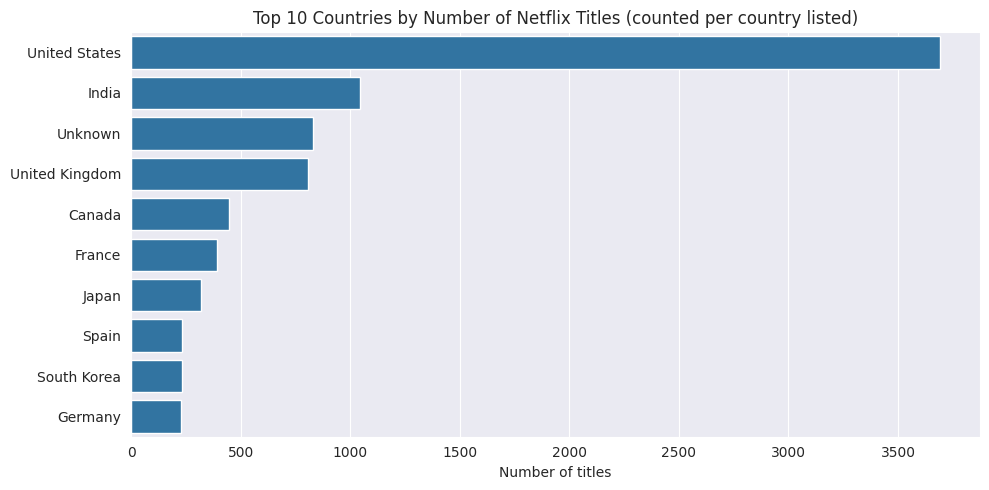

In [5]:
# 6) explode country and count
country_df = df.explode('country_list')
country_counts = country_df['country_list'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts.head(15)

# plot top 10 countries
top_countries = country_counts.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x='count', y='country')
plt.title('Top 10 Countries by Number of Netflix Titles (counted per country listed)')
plt.xlabel('Number of titles')
plt.ylabel('')
plt.tight_layout()
plt.show()


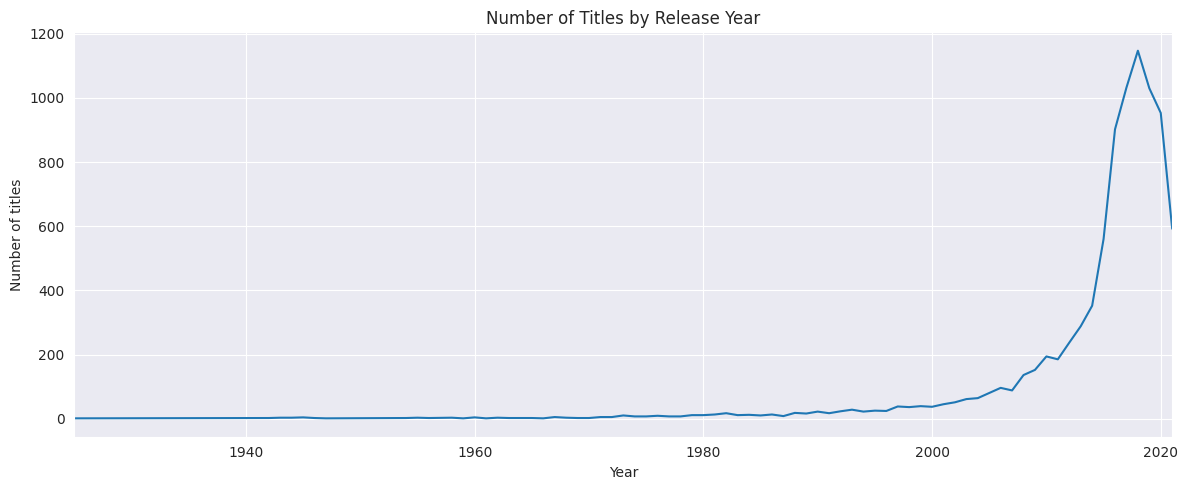

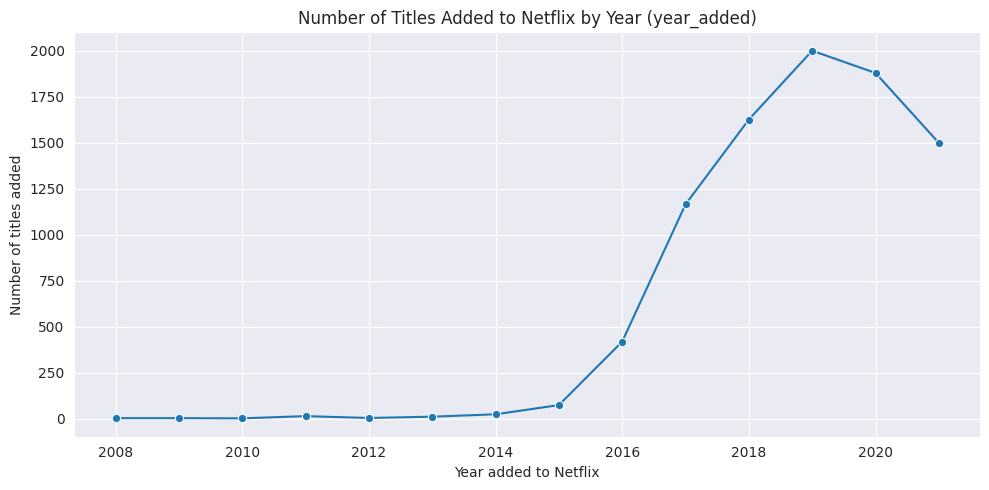

In [6]:
# releases by release_year (production year)
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
release_counts.plot(kind='line')
plt.title('Number of Titles by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.xlim(release_counts.index.min(), release_counts.index.max())
plt.tight_layout()
plt.show()

# titles added to Netflix by year (year_added) - more Netflix specific
added_counts = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=added_counts.index, y=added_counts.values, marker='o')
plt.title('Number of Titles Added to Netflix by Year (year_added)')
plt.xlabel('Year added to Netflix')
plt.ylabel('Number of titles added')
plt.tight_layout()
plt.show()


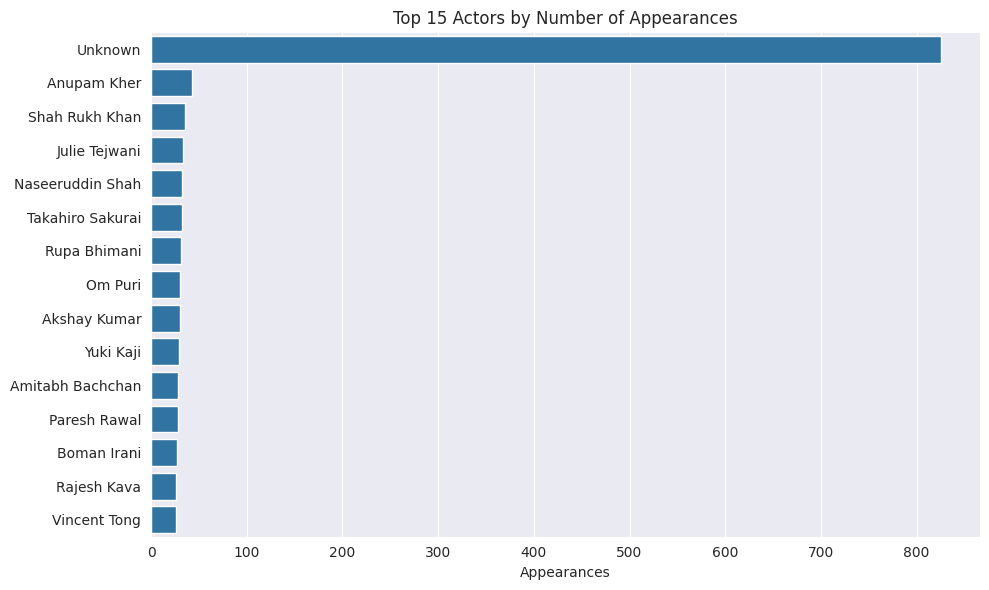

In [7]:
# 7) explode cast and count top actors
cast_df = df.explode('cast_list')
actor_counts = cast_df['cast_list'].value_counts().reset_index()
actor_counts.columns = ['actor','appearances']
actor_counts.head(20)

top_actors = actor_counts.head(15)
plt.figure(figsize=(10,6))
sns.barplot(x='appearances', y='actor', data=top_actors)
plt.title('Top 15 Actors by Number of Appearances')
plt.xlabel('Appearances')
plt.ylabel('')
plt.tight_layout()
plt.show()

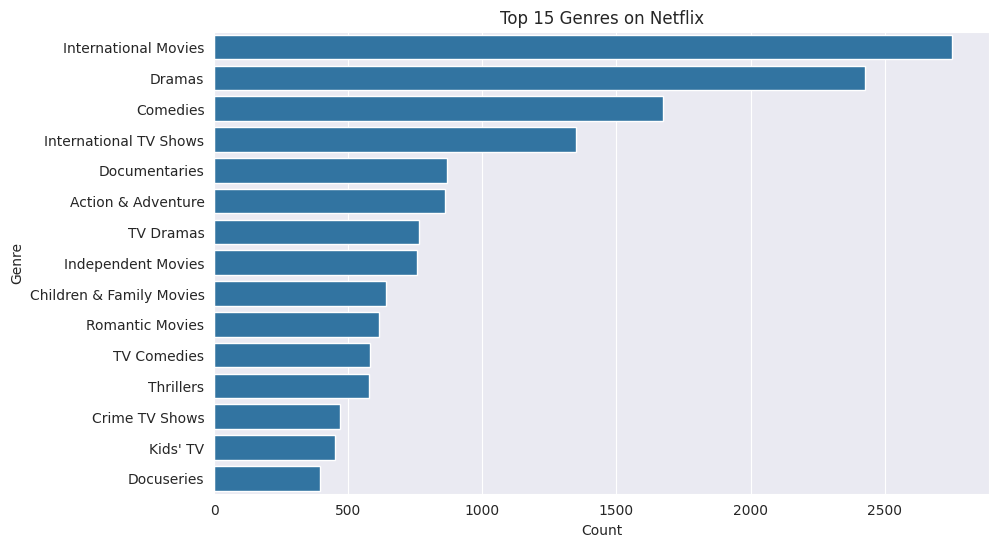

In [10]:
#8 GENRE ANALYSIS FIXED

# Step 1: Split genres into rows
genre_df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Step 2: Count top genres
genre_counts = genre_df['listed_in'].value_counts().head(15)

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


Saved top_countries.png to current working directory.


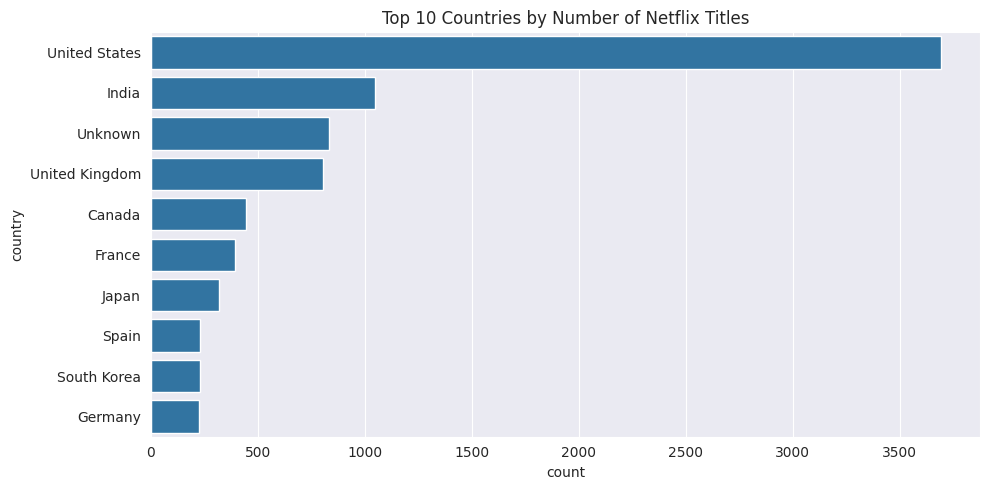

In [11]:
# 9) Example save of the country plot as PNG
fig = plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x='count', y='country')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.tight_layout()
fig.savefig('top_countries.png', dpi=150)
print("Saved top_countries.png to current working directory.")
